In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = np.eye(5)

In [3]:
a

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
# txt文件使用read_csv也可以读
path = 'D:/Google_Download/andrew_ml_ex14179/ex1data1.txt'
df = pd.read_csv(path)
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


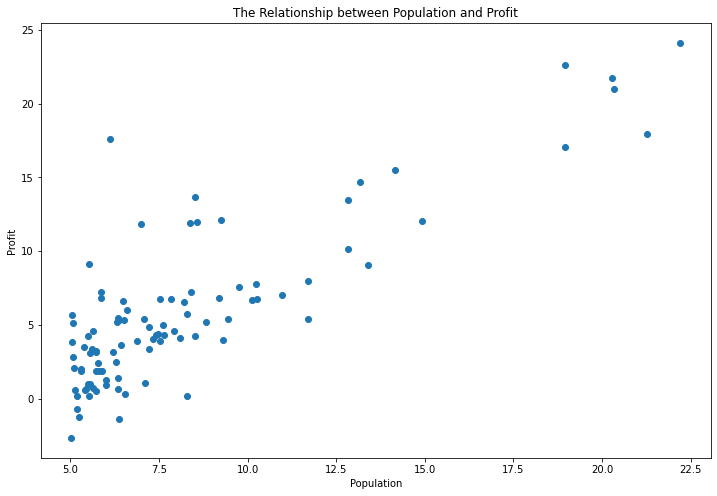

In [5]:
row = df['Population']
col = df['Profit']

# 绘制画布
plt.figure(figsize=(12,8))
# 绘图
plt.scatter(row,col)
# 设置x轴，y轴信息
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('The Relationship between Population and Profit')
plt.show()

In [6]:
# 这里X是一个向量，也可以看做二维矩阵
# 这里X,y和theta都是matrix类型，而不是ndarray类型，matrix类型中*直接做矩阵运算
def computeCost(X,y,theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [7]:
# 在第0列插入一列索引名叫ones，值全为1的数据
df.insert(0,'Ones',1)
df.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
columns = df.shape[1]
# X存储每一行，不包括最后一列，这里进行分割数据，以便后续传参
X = df.iloc[:,:-1]
# y提取最后一列利润
y = df.iloc[:,columns-1:columns]

In [9]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [11]:
# 代价函数应当是numpy矩阵，转换X和y并使用他们
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [12]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [13]:
computeCost(X,y,theta)

32.072733877455676

In [14]:
# 这里是算法核心
# X是人口数量，y是利润，theta是需要训练的参数，alpha是learning rate，iters是迭代次数
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    # theta.ravel().shape[1]表达的是theta矩阵的列数,对matrix类型的矩阵使用ravel方法得到的是一行多列的矩阵而不是一维数组
    parameters = int(theta.ravel().shape[1])
    # cost用于存储每一次的方差
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X*theta.T)-y
#         for j in range(parameters):
#             # term是theta0的偏导数
#             # temp[0][0]是theta0更改后的值，temp[0][1]是theta[0][1]更改后的值，multiply是普通乘法而非矩阵乘法
        term = np.multiply(error,X)
#             temp[0,j] = theta[0,j]-(alpha/len(X))*np.sum(term)
#             pass
        temp = theta - (alpha/X.shape[0])*np.sum(term,axis=0)
        theta = temp
        cost[i] = computeCost(X,y,theta)
        pass
    return theta,cost

In [15]:
iters = 1500
alpha = 0.01

In [16]:
g,cost = gradientDescent(X,y,theta,alpha,iters)
g,cost

(matrix([[-3.63029144,  1.16636235]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
        4.48338826]))

In [17]:
# 训练好以后，预测3.5万和7万人小吃摊利润
predict1 = [1,3.5]*g.T
print("predict1:",predict1)
predict2 = [1,7]*g.T
print("predict2:",predict2)

predict1: [[0.45197679]]
predict2: [[4.53424501]]


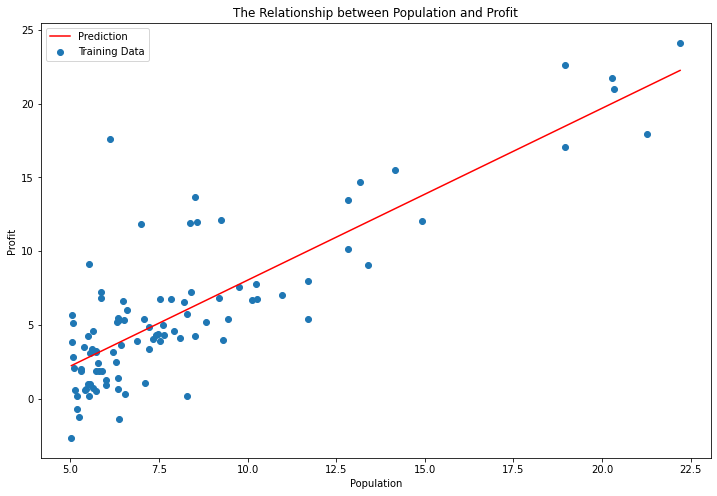

In [18]:
x = np.linspace(df.Population.min(),df.Population.max(),100)
f = g[0,0] + (g[0,1]*x)
fig,ax = plt.subplots(figsize=(12,8))
# 描绘产生的100个点
plt.plot(x,f,'r',label='Prediction')
plt.scatter(row,col,label='Training Data')
plt.legend(loc='best')
# 设置x,y轴及标题
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('The Relationship between Population and Profit')
# 显示原始数据加拟合后的曲线
plt.show()

In [19]:
path_multiTheta = 'D:/Google_Download/andrew_ml_ex14179/ex1data2.txt'
df_multiTheta = pd.read_csv(path_multiTheta)
df_multiTheta.head(5)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [20]:
# 特征归一化，df_multiTheta.std()是求其标准差
df_multiTheta = (df_multiTheta - df_multiTheta.mean(axis=0))/(df_multiTheta.std(axis=0))
df_multiTheta.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [21]:
# 继续梯度下降
df_multiTheta.insert(0,'Ones',1)
# 分离出X数据和y
columns2 = df_multiTheta.shape[1]
X2 = df_multiTheta.iloc[:,:-1]
y2 = df_multiTheta.iloc[:,columns2-1:columns2]

In [22]:
# 取其数组
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix([0,0,0])

In [23]:
g2,cost2 = gradientDescent(X2,y2,theta2,alpha,iters)
g2

matrix([[-1.10833328e-16,  8.84042349e-01, -5.24551809e-02]])

In [24]:
'predict：'+str(np.matrix([1,2200,2])*g2.T)

'predict：[[1944.78825739]]'

In [25]:
# 疑问：为什么归一化不影响训练出来的theta值？
# 答：归一化之后不能直接预测了，因为需要将该数据也进行归一化预测，再反归一化
# 正规方程解theta的原理是什么？

In [26]:
# 定义正规方程求解theta的函数
def NormalEqu(X,y):
    theta = np.linalg.inv(X.T*X)*X.T*y
    return theta

In [27]:
theta = NormalEqu(X,y)
theta

matrix([[-3.89578088],
        [ 1.19303364]])